In [ ]:
! pip install plotly

In [ ]:
import pandas as pd

ev_df = pd.read_csv("/content/Electric_Vehicle_Population_Data_20231102.csv")
reg_df = pd.read_csv("/content/Vehicle_Registration_Summary_20231102.csv")

print(ev_df.columns)
print(reg_df.columns)



Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')
Index(['Transaction Count', 'Calendar Year', 'Fiscal Year', 'Transaction Type',
       'Vehicle Primary Use', 'Vehicle Type',
       'Gross Vehicle Weight Rating Class',
       'Gross Vehicle Weight Rating Range (Pounds)', 'Electrification Level',
       'County', 'State'],
      dtype='object')


In [ ]:
import plotly.graph_objects as graph
ev_df = pd.read_csv("/content/Electric_Vehicle_Population_Data_20231102.csv")

node_labels = ev_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].append(ev_df['Make']).unique()
node_dict = {label: idx for idx, label in enumerate(node_labels)}

first_colm = ev_df['Make'].map(node_dict)
sec_colm = ev_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(node_dict)

link_values = [1] * len(ev_df)

conn_colors = []
for alt_type in ev_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']:
  if alt_type == 'Clean Alternative Fuel Vehicle Eligible':
    color = 'red'
  elif alt_type == 'Eligibility unknown as battery range has not been researched':
    color = 'green'
  else:
    color = 'blue'
  conn_colors.append(color)

fig = graph.Figure(graph.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=node_labels),
    link=dict(source= first_colm, target=sec_colm, value=link_values, color = conn_colors
    )
))

fig.update_layout(title_text="Sankey Diagram of Clean Fuel Eligibility wrt Vehicle Make", width=800, height=800 )
fig.show()

<ipython-input-107-d527bd3863c4>:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
import plotly.express as px
ev_df = pd.read_csv("/content/Electric_Vehicle_Population_Data_20231102.csv")

sunburst_data = ev_df.groupby(['Electric Vehicle Type','Make', 'Model Year']).size().reset_index(name='count')
# sunburst_data.head(40)
fig = px.sunburst(sunburst_data, path=['Electric Vehicle Type','Make', 'Model Year'], values='count')
fig.update_layout( title_text = "Sunburst chart showing the EV Type distribution across Make and Model Year", width=800, height=800)
fig.show()

In [ ]:
import plotly.express as px
reg_df = pd.read_csv("/content/Vehicle_Registration_Summary_20231102.csv")

reg_df = reg_df[reg_df['State'].isin(['WA'])]
elec_level_count = reg_df.groupby('Electrification Level').size().reset_index(name='count')

fig = px.treemap(elec_level_count, path=['Electrification Level'], values='count', color='count', hover_data=['Electrification Level','count'],color_continuous_scale='rainbow')
fig.update_traces(textinfo="label+percent entry")
fig.update_layout(title="Treemap of Electrification level in  Washington")

fig.show()

<ipython-input-30-26e4530d7ed7>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data.County):


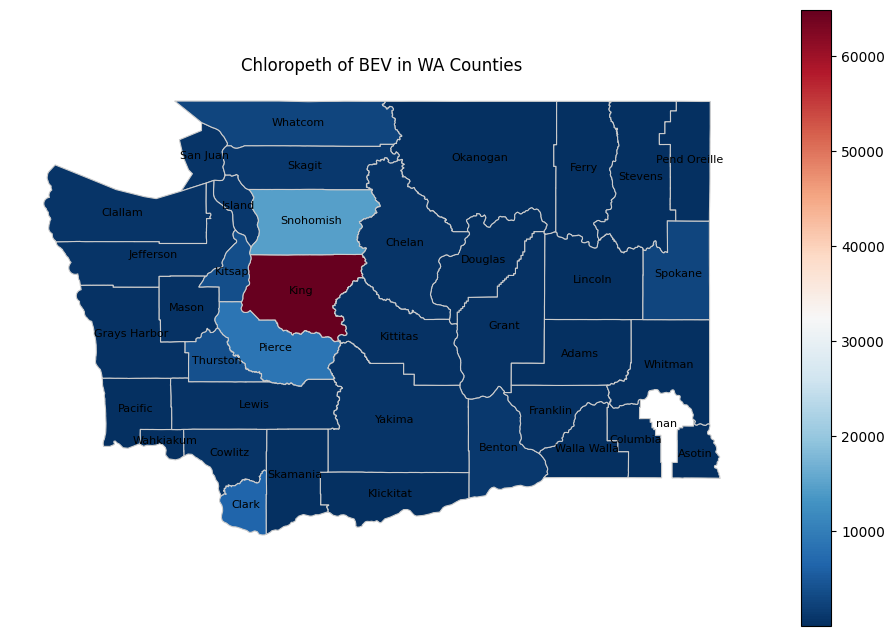

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

ev_data = pd.read_csv("/content/Electric_Vehicle_Population_Data_20231102.csv")
g_df = gpd.read_file('/content/WA_County_Boundaries.geojson')

ev_df = ev_data[ev_data['State']=='WA']
ev_df = ev_df[ev_df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
result = ev_df.groupby('County').size().reset_index(name = 'Count')

data = g_df.merge(result, left_on='JURISDICT_LABEL_NM', right_on='County', how='left')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
data.plot(column='Count', cmap='RdBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data.County):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

ax.set_title('Chloropeth of BEV in WA Counties')
ax.set_axis_off()

plt.show()

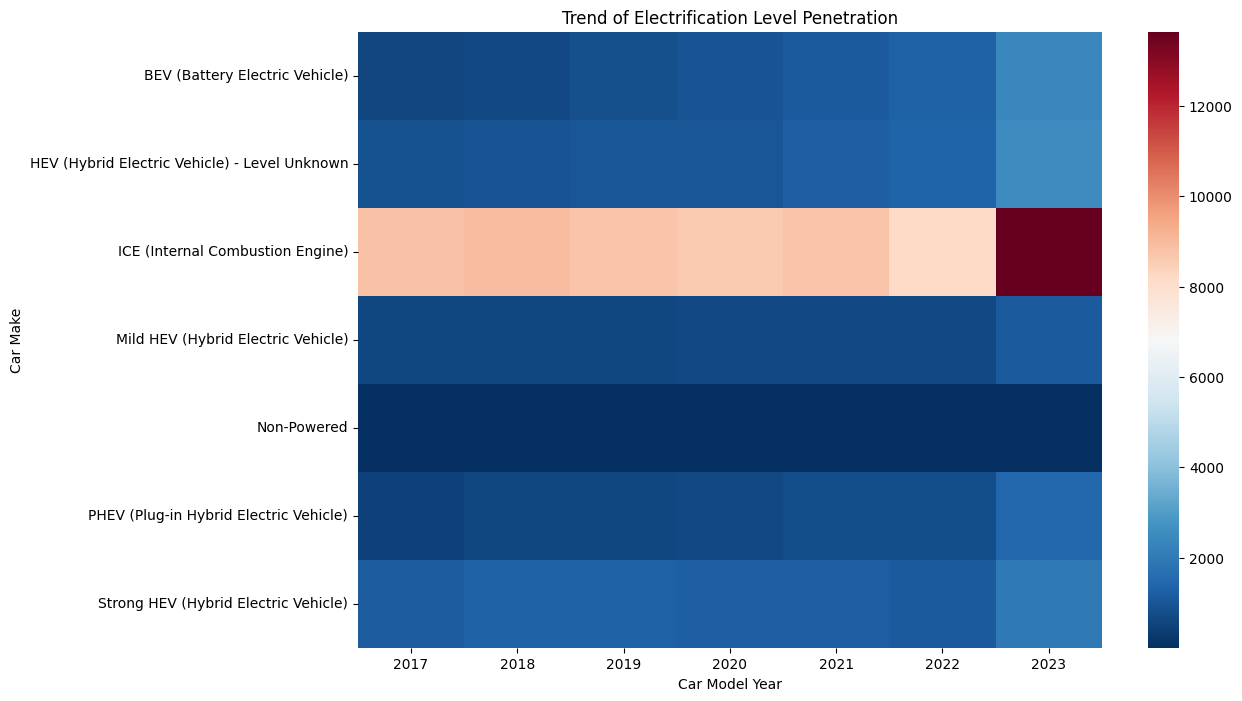

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reg_df = pd.read_csv("/content/Vehicle_Registration_Summary_20231102.csv")
table = reg_df.pivot_table(index="Electrification Level", columns="Calendar Year", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(table, annot=False, cmap="RdBu_r")

# Set labels and title
plt.xlabel("Car Model Year")
plt.ylabel("Car Make")
plt.title("Trend of Electrification Level Penetration")

# Show the heatmap
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

ev_df = pd.read_csv('/content/Electric_Vehicle_Population_Data_20231102.csv')
ev_df = ev_df[ev_df['Make'] == 'TESLA']
ev_df['coordinates'] = ev_df['Vehicle Location'].str.extract(r'POINT \((.*?)\)')
ev_df[['long', 'lat']] = ev_df['coordinates'].str.split(" ", expand=True).astype(float)

fig = go.Figure(data=go.Scattergeo(
        lon = ev_df['long'],
        lat = ev_df['lat'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Penetration of Tesla in US',
        geo_scope='usa',
    )
fig.show()

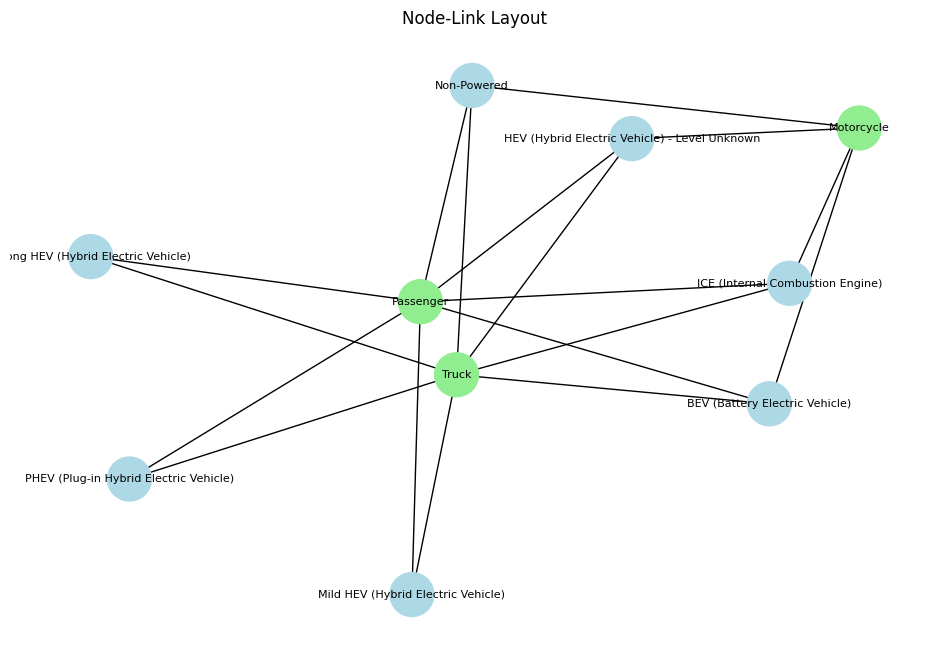

In [ ]:
import networkx as nx
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


reg_df = pd.read_csv('/content/Vehicle_Registration_Summary_20231102.csv')
reg_df = reg_df[reg_df['Vehicle Type'] != 'INCOMPLETE VEHICLE']

G = nx.Graph()
G.add_nodes_from(reg_df['Electrification Level'], type='Electrification Level')
G.add_nodes_from(reg_df['Vehicle Primary Use'], type='Vehicle Primary Use')

for index, row in reg_df.iterrows():
    G.add_edge(row['Electrification Level'], row['Vehicle Primary Use'])

node_colors = {
    node: '#add8e6' if 'Electrification Level' in G.nodes[node]['type'] else '#90ee90'
    for node in G.nodes
}

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.2)

node_size = 1000
# nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='pink')
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=[node_colors[node] for node in G.nodes])

node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')

nx.draw_networkx_edges(G, pos)

plt.title('Node-Link Layout')
plt.axis('off')
plt.show()

          Model
MODEL Y   29209
MODEL 3   27740
MODEL S    7533
MODEL X    5071
ROADSTER     48


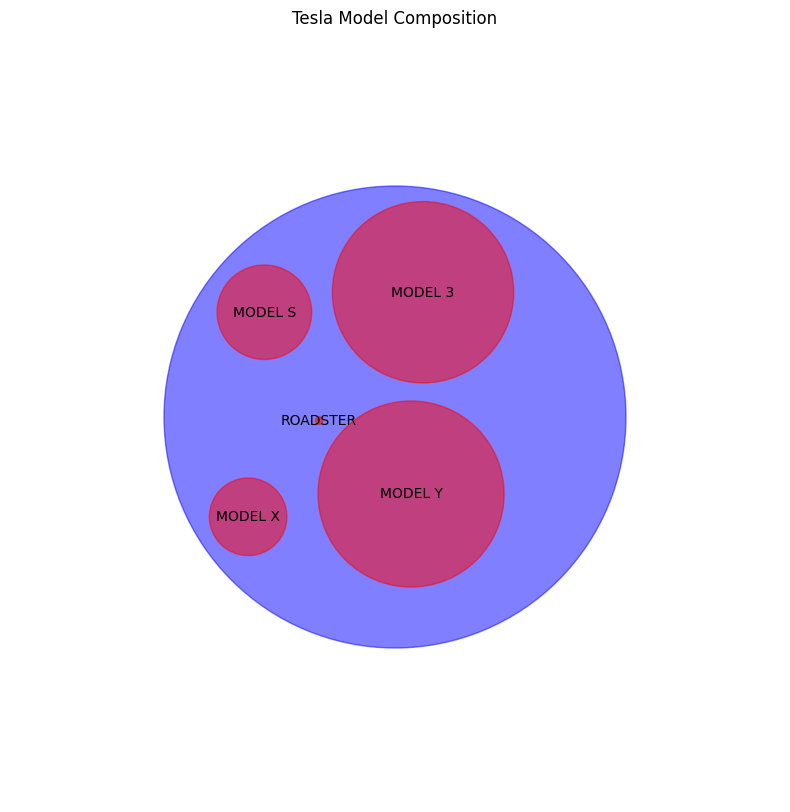

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/content/Electric_Vehicle_Population_Data_20231102.csv")
model_counts = df[df['Make'] == 'TESLA']['Model'].value_counts()
model_counts = pd.DataFrame(model_counts)
fig, ax = plt.subplots(figsize=(10, 10))


tesla_circle = plt.Circle((0.5, 0.5), 0.3, color='blue', alpha=0.5)
ax.add_artist(tesla_circle)

model_types = model_counts.index
model_sizes = model_counts.values
print(model_counts)
max_radius = 0.1

theta = np.linspace(0, 2 * np.pi, len(model_types), endpoint=False)
center= [[0.4,0.4],[0.5,0.55],[0.38,0.6],[0.35,0.4],[0.4,0.5]]
for i, model_type in enumerate(model_types):
    radius = max_radius * np.sqrt(model_sizes[i] / 20000)
    x = center[i][0] + radius * np.cos(theta[i])
    y = center[i][1] + radius * np.sin(theta[i])
    model_circle = plt.Circle((x, y), radius, color='red', alpha=0.5)
    ax.add_artist(model_circle)
    ax.text(x, y, model_type, ha='center', va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')

ax.set_title("Tesla Model Composition")
plt.axis('off')
plt.show()



